In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import Project1Functions as fcn
import statsmodels.api as sm 
import matplotlib.pyplot as plt



In [2]:
raw_data = pd.read_csv("/Users/isabellewang/Desktop/Concrete_Data.csv")
raw_data
print(raw_data.columns.tolist())

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [32]:
X = raw_data.iloc[:, 0:8] # end-exclusive
y = raw_data['Concrete compressive strength(MPa, megapascals) ']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # output Numpy array
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
standardized_data = pd.concat([X_scaled, y], axis=1)# axis=1: stack horizontally

X_log = np.log(X+1)


test_idx = np.arange(501, 631)
train_idx = np.setdiff1d(np.arange(len(raw_data)), test_idx)

X_train_raw = X.iloc[train_idx]
X_test_raw = X.iloc[test_idx]

X_train_scaled = X_scaled.iloc[train_idx]
X_test_scaled = X_scaled.iloc[test_idx]

X_train_log = X_log.iloc[train_idx]

y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


In [35]:
X_train_log2 = sm.add_constant(X_train_log)
reg_log = sm.OLS(y_train, X_train_log2).fit()
results_table = reg_log.summary2().tables[1]
pd.set_option('display.float_format', lambda x: f'{x:.3e}')
print(results_table)

                                                        Coef.  Std.Err.  \
const                                               7.982e+01 7.598e+01   
Cement (component 1)(kg in a m^3 mixture)           2.369e+01 1.072e+00   
Blast Furnace Slag (component 2)(kg in a m^3 mi...  2.308e+00 1.759e-01   
Fly Ash (component 3)(kg in a m^3 mixture)          2.089e-01 1.856e-01   
Water  (component 4)(kg in a m^3 mixture)          -3.829e+01 4.030e+00   
Superplasticizer (component 5)(kg in a m^3 mixt...  1.851e+00 4.173e-01   
Coarse Aggregate  (component 6)(kg in a m^3 mix...  4.166e+00 5.032e+00   
Fine Aggregate (component 7)(kg in a m^3 mixture)  -6.535e+00 3.907e+00   
Age (day)                                           9.035e+00 2.339e-01   

                                                            t      P>|t|  \
const                                               1.051e+00  2.938e-01   
Cement (component 1)(kg in a m^3 mixture)           2.210e+01  1.299e-86   
Blast Furnace Slag (c

                                             Feature  Coefficient  p-value
0                                              const      79.8197  0.29377
1          Cement (component 1)(kg in a m^3 mixture)      23.6872  0.00000
2  Blast Furnace Slag (component 2)(kg in a m^3 m...       2.3081  0.00000
3         Fly Ash (component 3)(kg in a m^3 mixture)       0.2089  0.26053
4          Water  (component 4)(kg in a m^3 mixture)     -38.2857  0.00000
5  Superplasticizer (component 5)(kg in a m^3 mix...       1.8505  0.00001
6  Coarse Aggregate  (component 6)(kg in a m^3 mi...       4.1662  0.40789
7  Fine Aggregate (component 7)(kg in a m^3 mixture)      -6.5349  0.09477
8                                          Age (day)       9.0345  0.00000


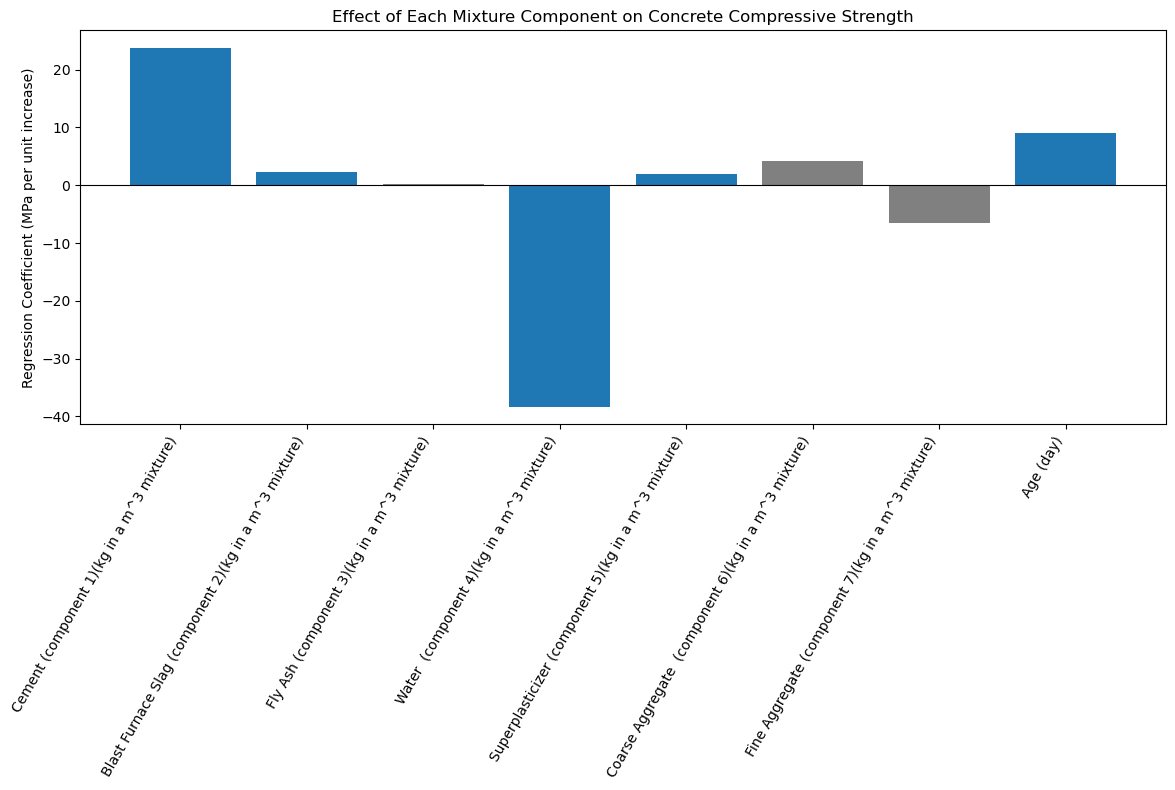

In [46]:
results_table = pd.DataFrame({
    'Feature': reg_log.params.index,
    'Coefficient': reg_log.params.values,
    'p-value': reg_log.pvalues.values
})
results_table = results_table.round({'Coefficient': 4, 'p-value': 5})
print(results_table)

filtered = results_table[results_table['Feature'] != 'const']
sig_colors = filtered['p-value'].apply(lambda p: 'gray' if p >= 0.05 else '#1f77b4')

plt.figure(figsize=(12,8))
plt.bar(filtered['Feature'], filtered['Coefficient'], color=sig_colors)
plt.xticks(rotation=60, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Effect of Each Mixture Component on Concrete Compressive Strength")
plt.ylabel("Regression Coefficient (MPa per unit increase)")
plt.tight_layout()
plt.show()

In [37]:
X_train_raw2 = sm.add_constant(X_train_raw)
reg = sm.OLS(y_train, X_train_raw2)
reg = reg.fit()
results_table1 = reg.summary2().tables[1]
pd.set_option('display.float_format', lambda x: f'{x:.3e}')
print(results_table1)


X_train_scaled2 = sm.add_constant(X_train_scaled)
reg_scaled = sm.OLS(y_train, X_train_scaled2).fit()
results_table2 = reg_scaled.summary2().tables[1]
pd.set_option('display.float_format', lambda x: f'{x:.3e}')
print(results_table2)

                                                        Coef.  Std.Err.  \
const                                              -5.204e+01 2.877e+01   
Cement (component 1)(kg in a m^3 mixture)           1.328e-01 9.424e-03   
Blast Furnace Slag (component 2)(kg in a m^3 mi...  1.250e-01 1.146e-02   
Fly Ash (component 3)(kg in a m^3 mixture)          1.067e-01 1.429e-02   
Water  (component 4)(kg in a m^3 mixture)          -1.331e-01 4.278e-02   
Superplasticizer (component 5)(kg in a m^3 mixt...  1.162e-01 1.001e-01   
Coarse Aggregate  (component 6)(kg in a m^3 mix...  2.863e-02 1.028e-02   
Fine Aggregate (component 7)(kg in a m^3 mixture)   3.408e-02 1.135e-02   
Age (day)                                           1.188e-01 5.940e-03   

                                                            t     P>|t|  \
const                                              -1.809e+00 7.082e-02   
Cement (component 1)(kg in a m^3 mixture)           1.410e+01 6.971e-41   
Blast Furnace Slag (comp

Cement (component 1)(kg in a m^3 mixture)
m: 8.438299480147165
b: 37.214600001649536
MSE: 203.52735421370537
VE 0.2654572124696287
MSE: 268.1033044233277
VE 0.3310617173172393
 
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
m: 2.691882320421123
b: 36.90199361481569
MSE: 270.2041286804114
VE 0.024816616666069047
MSE: 309.0863352232445
VE -0.08073142391103616
 
Fly Ash (component 3)(kg in a m^3 mixture)
m: -3.410854904093578
b: 37.14941648759574
MSE: 265.3488205813614
VE 0.04233972337166825
MSE: 382.78929779467245
VE -0.24691914758189726
 
Water  (component 4)(kg in a m^3 mixture)
m: -4.39458808235199
b: 36.80168982541358
MSE: 256.04737505235664
VE 0.07590921457511157
MSE: 260.30583992755936
VE 0.08350478255745952
 
Superplasticizer (component 5)(kg in a m^3 mixture)
m: 5.272673421396028
b: 36.38564506906626
MSE: 249.238817890767
VE 0.10048171774479686
MSE: 195.64229276781143
VE 0.19439382134884042
 
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
m: -2.1332046467694976
b: 3

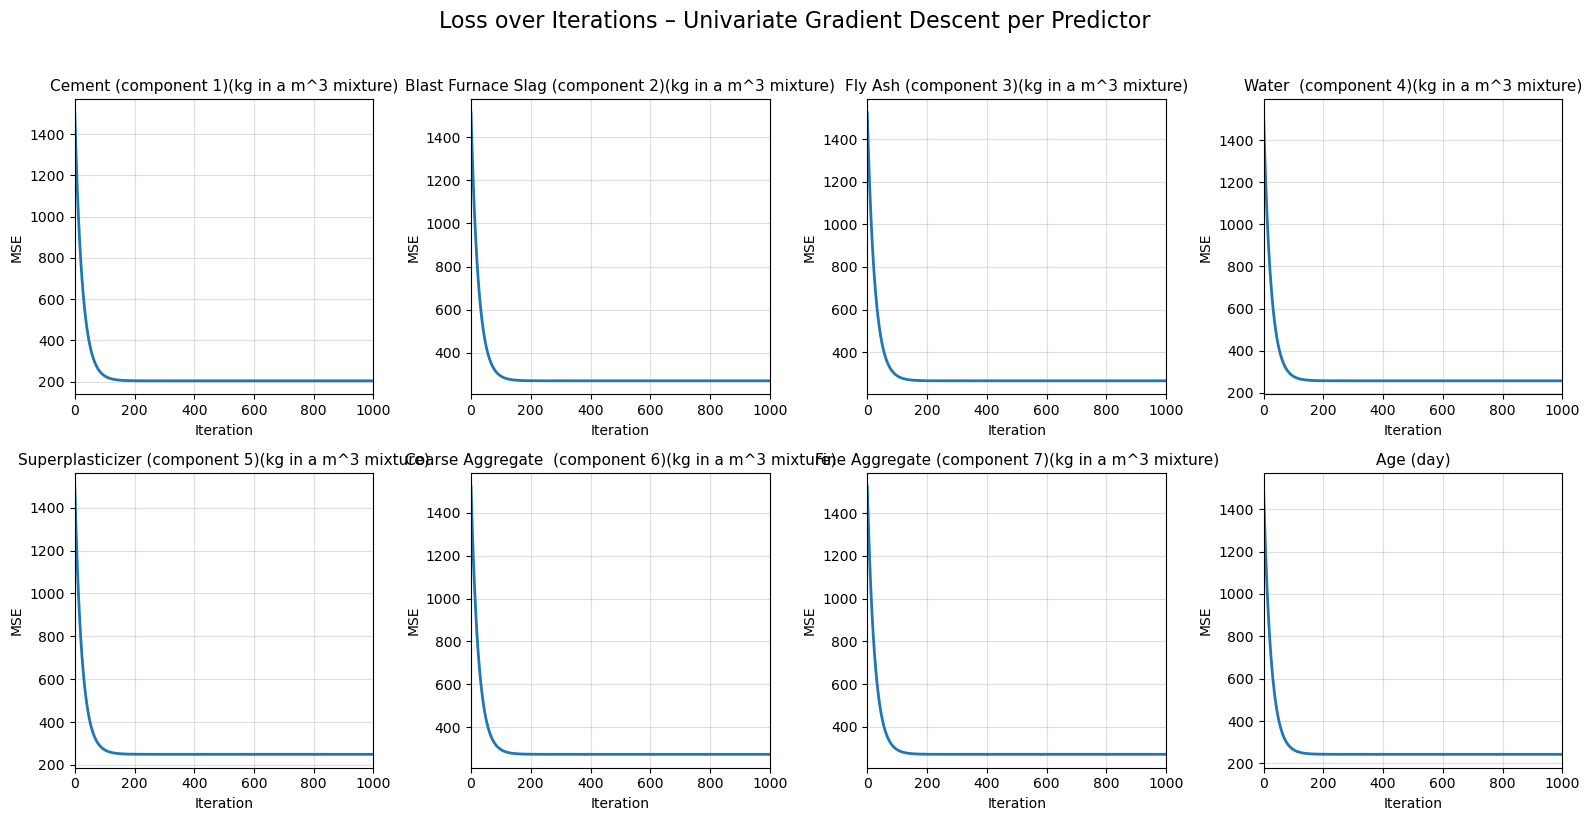

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    attribute = X_scaled[col]
    X_train, X_test = attribute.iloc[train_idx], attribute.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    m,b,losses = fcn.univariate_gradient_descent(X_train,y_train,1000,0.01)

    y_pred_train = X_train*m + b
    y_pred_test = X_test*m + b

    MSE_train = fcn.mean_squared_error(y_train,y_pred_train)
    VE_train= explained_variance_score(y_train,y_pred_train)
    MSE_test = fcn.mean_squared_error(y_test,y_pred_test)
    VE_test= explained_variance_score(y_test,y_pred_test)
    
    print(col)
    print("m:" , m)
    print("b:" , b)
    print("MSE:" , MSE_train)
    print("VE",VE_train)
    print("MSE:" , MSE_test)
    print("VE",VE_test)
    print(" ")

    
    axes[i].plot(losses, linewidth=2)
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("MSE")
    axes[i].set_xlim(0, 1000)
    axes[i].grid(True, alpha=0.4)

plt.suptitle("Loss over Iterations – Univariate Gradient Descent per Predictor", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Cement (component 1)(kg in a m^3 mixture): start loss=46358.72, end loss=226.70
Cement (component 1)(kg in a m^3 mixture)
m: 0.12314600717216771
b: 1.000681847992948
MSE: 226.69976640615715
VE 0.19245939794445777
MSE: 256.46931703119867
VE 0.31478694835975574
 
Blast Furnace Slag (component 2)(kg in a m^3 mixture): start loss=8120.37, end loss=888.66
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
m: 0.23002521575914725
b: 1.0323124121507303
MSE: 888.6550431251069
VE -0.9818846954770928
MSE: 973.7455575776013
VE -2.6511350595126273
 
Fly Ash (component 3)(kg in a m^3 mixture): start loss=5183.33, end loss=1109.58
Fly Ash (component 3)(kg in a m^3 mixture)
m: 0.2484469501113624
b: 1.037501474391573
MSE: 1109.5826254395063
VE -1.3136953182739188
MSE: 573.6015320245886
VE 0.03248736906876526
 
Water  (component 4)(kg in a m^3 mixture): start loss=19165.10, end loss=336.18
Water  (component 4)(kg in a m^3 mixture)
m: 0.19298039206032072
b: 0.9977916355772326
MSE: 336.1837194886526
VE

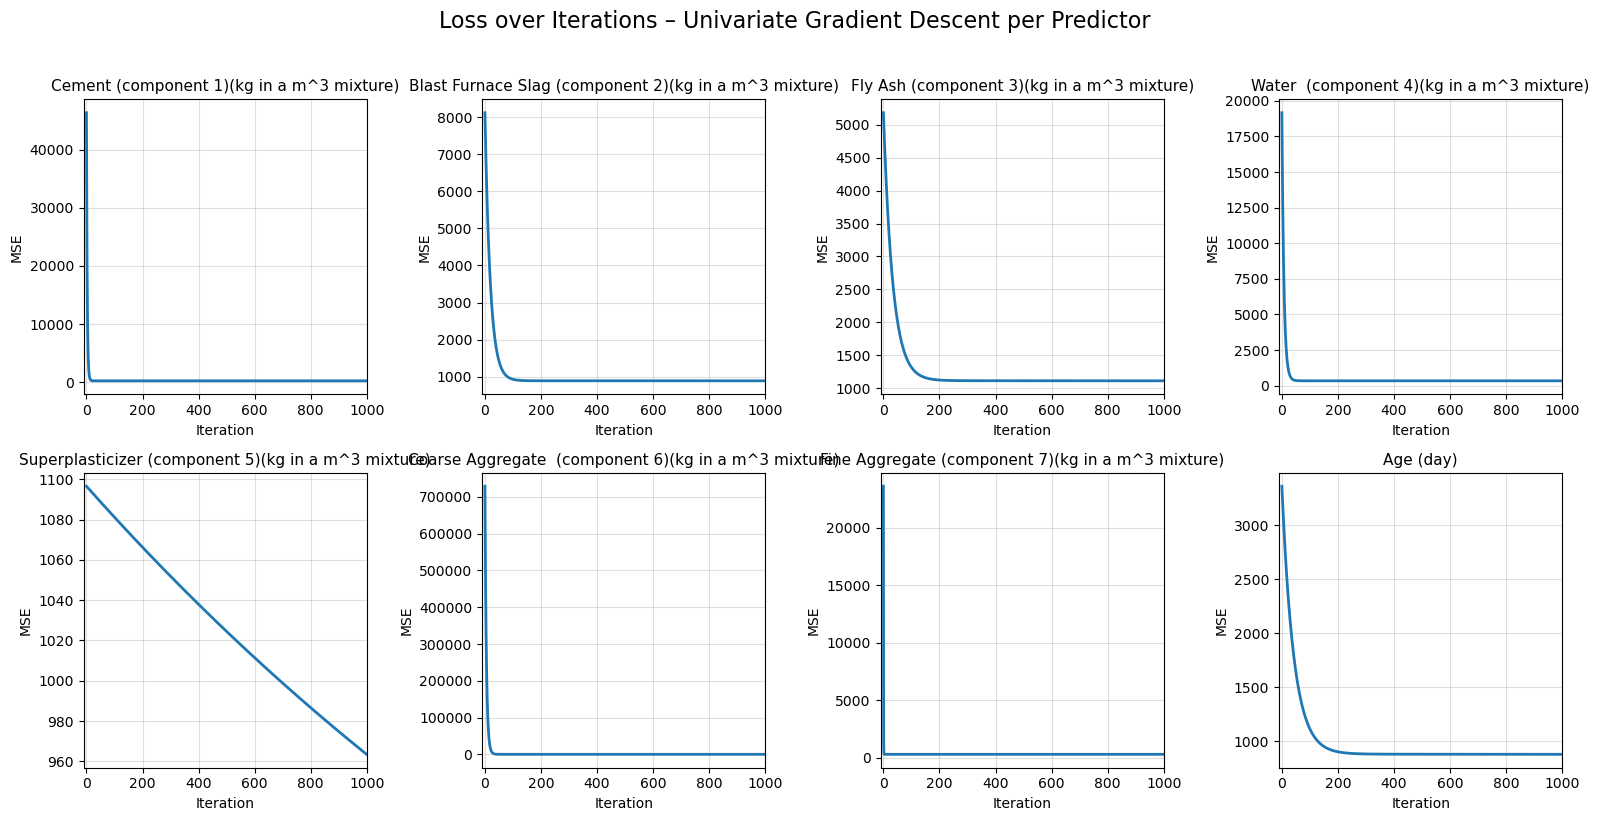

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    attribute = X[col]
    X_train, X_test = attribute.iloc[train_idx], attribute.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    m,b,losses= fcn.univariate_gradient_descent(X_train,y_train,1000,0.000001)
    print(f"{col}: start loss={losses[0]:.2f}, end loss={losses[-1]:.2f}")


    y_pred_train = X_train*m + b
    y_pred_test = X_test*m + b

    MSE_train = fcn.mean_squared_error(y_train,y_pred_train)
    VE_train= explained_variance_score(y_train,y_pred_train)
    MSE_test = fcn.mean_squared_error(y_test,y_pred_test)
    VE_test= explained_variance_score(y_test,y_pred_test)
    
    print(col)
    print("m:" , m)
    print("b:" , b)
    print("MSE:" , MSE_train)
    print("VE",VE_train)
    print("MSE:" , MSE_test)
    print("VE",VE_test)
    print(" ")

    axes[i].plot(losses, linewidth=2)
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("MSE")
    axes[i].set_xlim(-10, 1000)
    axes[i].grid(True, alpha=0.4)

plt.suptitle("Loss over Iterations – Univariate Gradient Descent per Predictor", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



In [8]:
X = standardized_data.iloc[:, 0:8] # end-exclusive
y = raw_data['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
weights, b = fcn.multivariate_gradient_descent(X_train.values,y_train.values,1,0.01)


y_pred_train = X_train.values @ weights + b
y_pred_test = X_test.values @ weights + b

MSE_train = fcn.mean_squared_error(y_train,y_pred_train)
VE_train= explained_variance_score(y_train,y_pred_train)
MSE_test = fcn.mean_squared_error(y_test,y_pred_test)
VE_test= explained_variance_score(y_test,y_pred_test)


print(weights)
print(b)
print("MSE:" , MSE_train)
print("VE",VE_train)
print("MSE:" , MSE_test)
print("VE",VE_test)
print(" ")



[ 0.15307245  0.0703186  -0.03032705 -0.12437869  0.18783722 -0.03756149
 -0.06416615  0.11748714]
0.7394399999999991
MSE: 1580.0970859349502
VE 0.029251994655077773
MSE: 954.2626564271826
VE 0.027544763540275574
 
